In [823]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import scipy.stats as stats
import seaborn as sns
import re

sns.set_style('darkgrid')
plt.rcParams['scatter.edgecolors'] = 'none'

# 1. Предварительный просмотр данных

In [824]:
data_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'dataset//housing_market_dataset.csv'))

dataset = pd.read_csv(data_path)
dataset.head(3)

,url,Заголовок,Новостройка,Этап строительства,Год постройки,Класс жилья,МЦК,Кол-во просмотров,Кол-во просмотров сегодня,Описание,...,Ближайшая станция метро,Расстояние до метро,Ближайшая школа,Рейтинг школы,Адрес ближайшей школы,Расстояние до ближайшей школы,Район,Рейтинг района,Номер этажа,Очищенная цена за м²
0,https://move.ru/objects/moskva_ulica_baykalska...,"Продажа 1-комнатной квартиры, 31 м², Москва, у...",NaN,NaN,1967.0,NaN,NaN,125,3.0,ВП-738 СВОБОДНАЯ ПРОДАЖА. ДОМ ПОД СНОС. ЮРИДИЧ...,...,м. Щелковская,1294 м.,ГБОУ школа № 1352,Место в рейтинге №47,"107207,г.Москва, Щелковское ш., д. 77 А",190 м,NaN,NaN,3,169355
1,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продам 2-комнатную квартиру, 83.2 м², Москва, ...","ЖК City Park («Сити Парк»), м. Выставочная",Отделка,2020.0,Элит класс,МЦК Деловой центр,202,1.0,Квартира премиум класса в ЖК CITY PARK с видам...,...,м. Выставочная,510 м.,ГБОУ школа № 2055,Место в рейтинге №456,"123100, г. Москва, ул. 2-я Черногрязская, дом 7",776 м,Пресненский,14 место из 58 в рейтинге районов,4,268000
2,https://move.ru/objects/prodaetsya_2-komn_kvar...,"Продаю 2-комнатную квартиру, 89.6 м², Москва, ...","ЖК Silver (ЖК «Резиденции кинематографистов»),...",Отделка,2018.0,Бизнес класс,МЦК Ботанический сад,20,1.0,"Продается 2-комн. квартира, площадью 89.6 м2 в...",...,м. Свиблово,"12 мин, 1 км",ГБОУ Гимназия «Свиблово»,Место в рейтинге №28,"129323, г. Москва, ул. Седова, д. 4, корп. 1",619 м,Свиблово,15 место из 58 в рейтинге районов,2,174786


In [825]:
dataset.shape

(13001, 37)

In [826]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            13001 non-null  object 
 1   Заголовок                      13001 non-null  object 
 2   Новостройка                    6080 non-null   object 
 3   Этап строительства             5812 non-null   object 
 4   Год постройки                  7025 non-null   float64
 5   Класс жилья                    5812 non-null   object 
 6   МЦК                            7633 non-null   object 
 7   Кол-во просмотров              13001 non-null  int64  
 8   Кол-во просмотров сегодня      7224 non-null   float64
 9   Описание                       12263 non-null  object 
 10  Информация                     13001 non-null  object 
 11  Адрес                          13001 non-null  object 
 12  Тип здания                     12897 non-null 

# 2. Предобработка данных

In [827]:
dataset.duplicated().sum()

11

In [828]:
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [829]:
dataset.shape

(12990, 37)

## Выбор признаков для анализа

In [830]:
dataset.columns

Index(['url', 'Заголовок', 'Новостройка', 'Этап строительства',
       'Год постройки', 'Класс жилья', 'МЦК', 'Кол-во просмотров',
       'Кол-во просмотров сегодня', 'Описание', 'Информация', 'Адрес',
       'Тип здания', 'Количество этажей', 'Цена', 'цена за м²',
       'Комиссия агенту', 'Количество комнат', 'Этажность', 'Тип объекта',
       'Тип объявления', 'Общая площадь', 'Дата публикации',
       'Дата  обновления', 'Площадь кухни', 'Возможна ипотека', 'Лифт',
       'Ближайшая станция метро', 'Расстояние до метро', 'Ближайшая школа',
       'Рейтинг школы', 'Адрес ближайшей школы',
       'Расстояние до ближайшей школы', 'Район', 'Рейтинг района',
       'Номер этажа', 'Очищенная цена за м²'],
      dtype='object')

In [831]:
columns = ['url','МЦК', 'Описание', 'Информация', 'цена за м²','Дата публикации','Дата  обновления','Адрес ближайшей школы', 'Район',
           'Рейтинг района', 'Кол-во просмотров сегодня','Новостройка','Площадь кухни','Количество этажей']

In [832]:
dataset.drop(columns=columns, inplace=True)
dataset.shape

(12990, 23)

## Проверка признаков

### Этап строительства

In [833]:
dataset['Этап строительства'].unique()

array([nan, 'Отделка', 'Сдан', 'Возведение стен', 'В проекте', 'Площадка',
       'Заморожено', 'Котлован'], dtype=object)

In [834]:
dataset['Этап строительства'].value_counts()

Этап строительства
Возведение стен    3208
Сдан               1050
Отделка             803
Площадка            541
В проекте           159
Котлован             41
Заморожено            4
Name: count, dtype: int64

In [835]:
dataset['Этап строительства'].isnull().sum()

7184

In [836]:
# замена пропусков
dataset.loc[dataset[dataset['Этап строительства'].isnull()].index, 'Этап строительства'] = 'Неизвестно'

# замороженных мало, исключаем эти записи
dataset = dataset[dataset['Этап строительства']!='Заморожено']

# возможны неизвестные дома, которые явно прошли акт сдачи (условно, до 2000 года включительно)
dataset.loc[dataset[dataset['Год постройки'] <= 2000].index, 'Этап строительства'] = 'Сдан'


In [837]:
# проверка изменений
dataset['Этап строительства'].value_counts()

Этап строительства
Неизвестно         4812
Сдан               3424
Возведение стен    3208
Отделка             803
Площадка            541
В проекте           158
Котлован             40
Name: count, dtype: int64

### Год постройки

In [838]:
# пропуски не обрабатываем (нет смысла портить тип столбца)
dataset['Год постройки'].isna().sum()

5970

In [839]:
dataset['Год постройки'].value_counts()

Год постройки
2019.0    2111
2018.0     795
2021.0     564
2020.0     298
2011.0     150
          ... 
1898.0       1
1914.0       1
1885.0       1
1889.0       1
1945.0       1
Name: count, Length: 114, dtype: int64

In [840]:
# заменим на десятилетия, сократив уникальные значения
dataset['Год постройки'] = dataset['Год постройки'] // 10 * 10

In [841]:
# проверка изменения
dataset['Год постройки'].value_counts()

Год постройки
2010.0    3401
2020.0     862
1960.0     737
1970.0     521
2000.0     400
1980.0     336
1950.0     335
1990.0     258
1930.0      57
1920.0      40
1940.0      30
1910.0      21
1900.0      11
1880.0       5
1890.0       1
1870.0       1
Name: count, dtype: int64

### Класс жилья

In [842]:
dataset['Класс жилья'].unique()

array([nan, 'Элит класс', 'Бизнес класс', 'Эконом класс', 'Комфорт класс'],
      dtype=object)

In [843]:
# замена пропусков
dataset.loc[dataset[dataset['Класс жилья'].isnull()].index, 'Класс жилья'] = 'Неизвестно'

In [844]:
# проверка изменений
dataset['Класс жилья'].value_counts()

Класс жилья
Неизвестно       7184
Бизнес класс     3411
Комфорт класс    1871
Элит класс        345
Эконом класс      175
Name: count, dtype: int64

### Тип здания

In [845]:
dataset['Тип здания'].unique()

array(['Панельное', 'Монолитно-кирпичный', 'Монолитное', 'Монолитный',
       'Кирпичное', nan, 'Блочное', 'Монолитно-кирпичное', 'Сталинское',
       'Панельный', 'Панельно-кирпичное'], dtype=object)

In [846]:
dataset['Тип здания'].value_counts()

Тип здания
Монолитное             5223
Кирпичное              4487
Блочное                1662
Монолитно-кирпичное     703
Панельное               593
Монолитно-кирпичный     156
Сталинское               45
Монолитный               10
Панельный                 2
Панельно-кирпичное        1
Name: count, dtype: int64

Исправим двойственные представления одного и того же признака

In [847]:
# замена пропусков
dataset.loc[dataset[dataset['Тип здания'].isnull()].index, 'Тип здания'] = 'Неизвестно'

# приведение к единообразию записи признаков
dataset.loc[dataset[dataset['Тип здания'] == 'Панельный'].index, 'Тип здания'] = 'Панельное'
dataset.loc[dataset[dataset['Тип здания'] == 'Монолитный'].index, 'Тип здания'] = 'Монолитное'
dataset.loc[dataset[dataset['Тип здания'] == 'Монолитно-кирпичный'].index, 'Тип здания'] = 'Монолитно-кирпичное'

# удалим запись с одним наблюдением
dataset = dataset[dataset['Тип здания'] != 'Панельно-кирпичное']

In [848]:
# проверим изменения
dataset['Тип здания'].value_counts()

Тип здания
Монолитное             5233
Кирпичное              4487
Блочное                1662
Монолитно-кирпичное     859
Панельное               595
Неизвестно              104
Сталинское               45
Name: count, dtype: int64

### Цена

In [849]:
dataset['Цена'].sample(5)

8330     7 300 000 ₽
2293    10 500 000 ₽
7856     7 100 000 ₽
5755    20 365 729 ₽
9950     7 300 000 ₽
Name: Цена, dtype: object

Преобразуем столбец к нормальному численному представлению

In [850]:
# удалим знак ₽
dataset['Цена'] = dataset['Цена'].apply(lambda x: x[:-1] if pd.notna(x) else np.nan)

# заменим лишние пробелы
dataset['Цена'] = dataset['Цена'].str.replace(' ', '')

# приведем получившийся object к числовому типу
dataset['Цена'] = dataset['Цена'].astype('int64')

# опишем цену в млн. дабы в датасете не было больших численных значений
dataset['Цена, млн'] = dataset['Цена'] / 1_000_000
dataset.drop(columns=['Цена'], inplace=True)

In [851]:
# проверим на корректность (не должно быть отрицательных)
len(dataset[dataset['Цена, млн'] < 0])

0

In [852]:
# и проверим изменения
dataset['Цена, млн'].value_counts()

Цена, млн
6.100000    328
7.100000    309
6.200000    272
7.300000    272
6.000000    196
           ... 
8.345700      1
8.373800      1
8.401900      1
8.458100      1
5.733626      1
Name: count, Length: 4859, dtype: int64

### Очищенная цена за м², млн

In [853]:
# приведем к млн и другой валютный показатель
dataset['Очищенная цена за м², млн'] = dataset['Очищенная цена за м²'] / 1000

dataset.drop(columns=['Очищенная цена за м²'], inplace=True)

# и сразу проверим неотрицательность
len(dataset[dataset['Очищенная цена за м², млн'] < 0])

0

### Комиссия агенту

In [854]:
dataset['Комиссия агенту'].unique()

array([nan, 'без комиссии', '3%', '2%', '1%', '100%'], dtype=object)

In [855]:
dataset['Комиссия агенту'].value_counts()

Комиссия агенту
без комиссии    5183
100%              17
2%                 5
3%                 1
1%                 1
Name: count, dtype: int64

In [856]:
# заменим пропуски
dataset.loc[dataset[dataset['Комиссия агенту'].isna()].index, 'Комиссия агенту'] = 'Неизвестно'

# уберем наблюдения с малой частотой
dataset = dataset[~dataset['Комиссия агенту'].isin(['1%', '2%', '3%'])]


In [857]:
dataset['Комиссия агенту'].value_counts()

Комиссия агенту
Неизвестно      7778
без комиссии    5183
100%              17
Name: count, dtype: int64

Видим что комиссии либо нет, либо она неизвестна. Наблюдения с комиссией крайне разрежены относительно всего признака, поэтому просто его удалим.

In [858]:
dataset.drop(columns=['Комиссия агенту'], inplace=True)

### Общая площадь

In [859]:
dataset['Общая площадь'].isna().sum()

0

In [860]:
dataset['Общая площадь'].sample(5)

810      87.41 м²
11436       67 м²
4387        53 м²
4824     63.04 м²
6245        53 м²
Name: Общая площадь, dtype: object

In [861]:
# выделим число
def extract_number(string) -> float | None:
    match = re.search(r'\d+(\.\d+)?', string)
    if match:
        return float(match.group())
    else:
        return None
    
dataset['Общая площадь'] = dataset['Общая площадь'].astype('str').apply(extract_number)

In [862]:
# проверка
dataset['Общая площадь'].sample(5)

3930      45.0
1136     120.3
11276     45.5
9792      79.0
4145      71.7
Name: Общая площадь, dtype: float64

In [863]:
dataset['Общая площадь'].isna().sum()

0

In [864]:
len(dataset[dataset['Общая площадь'] < 0])

0

### Возможна ипотека

In [865]:
dataset['Возможна ипотека'].unique()

array(['да', nan], dtype=object)

Замена этого nan по хорошему требует какого-то исследования, но т.к. сейчас не стоит задачи построить модель - заменим на "нет" (позднее увидим что таких значений будет менее 12%)

In [866]:
dataset.loc[dataset[dataset['Возможна ипотека'].isna()].index, 'Возможна ипотека'] = 'нет'

In [867]:
# проверим изменения
dataset['Возможна ипотека'].value_counts()

Возможна ипотека
да     11351
нет     1627
Name: count, dtype: int64

### Лифт

In [868]:
dataset['Лифт'].unique()

array([nan, 'да'], dtype=object)

In [869]:
# аналогично ипотеке заменим пропуски на 'нет'
dataset.loc[dataset[dataset['Лифт'].isna()].index, 'Лифт'] = 'нет'

In [870]:
# перепроверим
dataset['Лифт'].value_counts()

Лифт
да     9211
нет    3767
Name: count, dtype: int64

### Рейтинг школы

In [871]:
dataset['Рейтинг школы'].value_counts()

Рейтинг школы
Место в рейтинге №28     903
Место в рейтинге №120    753
Место в рейтинге №279    599
Место в рейтинге №603    418
Место в рейтинге №94     317
                        ... 
Место в рейтинге №99       1
Место в рейтинге №627      1
Место в рейтинге №601      1
Место в рейтинге №625      1
Место в рейтинге №537      1
Name: count, Length: 654, dtype: int64

In [872]:
dataset['Рейтинг школы'].isna().sum()

0

Для преобразования к категориальной шкале вычленим номер в рейтинге

In [873]:
dataset['Рейтинг школы'] = dataset['Рейтинг школы'].astype('str').apply(extract_number).astype('int64')

In [874]:
# перепроверка
dataset['Рейтинг школы'].value_counts()

Рейтинг школы
28     903
120    753
279    599
603    418
94     317
      ... 
99       1
627      1
601      1
625      1
537      1
Name: count, Length: 654, dtype: int64

In [875]:
len(dataset[dataset['Рейтинг школы'] <= 0])

0

### Расстояние до метро

In [876]:
dataset['Расстояние до метро'].isna().sum()

0

In [877]:
dataset['Расстояние до метро'].value_counts()

Расстояние до метро
995 м.                        742
37 мин,             7.1 км    733
1671 м.                       550
2 км                          371
36 мин,             8.5 км    365
                             ... 
1079 м.                         1
691 м.                          1
1689 м.                         1
29 мин,             2,4 км      1
58 мин,             4,8 км      1
Name: count, Length: 1812, dtype: int64

In [878]:
# приводим к метрам
to_replace = [r'\d+\s*мин,?\s*', r'\s*км\.?', r'\s*м\.?'] 
new_vals = ['', '000', '']

dataset['Расстояние до метро, м'] = pd.to_numeric(dataset['Расстояние до метро'].replace(to_replace, new_vals, regex=True), errors='coerce')

dataset.drop(columns=['Расстояние до метро'], inplace=True)

In [879]:
# перепроверка
dataset['Расстояние до метро, м'].isna().sum()

2171

In [880]:
dataset['Расстояние до метро, м'].sample(10)

11423    1669.0
3048     2000.0
680      1671.0
2349      656.0
2048     1671.0
1290     1000.0
2724        8.8
6483      560.0
5183     1236.0
372         3.3
Name: Расстояние до метро, м, dtype: float64

### Расстояние до ближайшей школы

In [881]:
dataset['Расстояние до ближайшей школы'].isna().sum()

0

In [882]:
dataset['Расстояние до ближайшей школы'].value_counts()

Расстояние до ближайшей школы
~ 2.9 км       805
~ 1.4 км       609
570 м          443
~ 2.4 км       366
~ 1.2 км       334
              ... 
989 м            1
~ 8.5 км         1
37 м             1
~ 6.7 км         1
~ 2142.1 км      1
Name: count, Length: 1033, dtype: int64

In [883]:
# приводим к метрам
to_replace = [r'\s*км\.?', r'\s*м.?']
new_vals = ['000', '']

dataset['Расстояние до ближайшей школы, м'] = pd.to_numeric(dataset['Расстояние до ближайшей школы'].replace(to_replace, new_vals, regex=True), errors='coerce')

dataset.drop(columns=['Расстояние до ближайшей школы'], inplace=True)

In [884]:
# перепроверка
dataset['Расстояние до ближайшей школы, м'].isna().sum()

3129

In [885]:
dataset['Расстояние до ближайшей школы, м']

0        190.0
1        776.0
2        619.0
3        931.0
4        754.0
         ...  
12985      NaN
12986      NaN
12987      NaN
12988      NaN
12989      NaN
Name: Расстояние до ближайшей школы, м, Length: 12978, dtype: float64

# 3. Описательные статистики

In [886]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12978 entries, 0 to 12989
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Заголовок                         12978 non-null  object 
 1   Этап строительства                12978 non-null  object 
 2   Год постройки                     7008 non-null   float64
 3   Класс жилья                       12978 non-null  object 
 4   Кол-во просмотров                 12978 non-null  int64  
 5   Адрес                             12978 non-null  object 
 6   Тип здания                        12978 non-null  object 
 7   Количество комнат                 12978 non-null  int64  
 8   Этажность                         12978 non-null  int64  
 9   Тип объекта                       12978 non-null  object 
 10  Тип объявления                    12978 non-null  object 
 11  Общая площадь                     12978 non-null  float64
 12  Возможна 

**Набор данных представлен следующими признаками:**

- **Категориальные:**  
  Адрес, Ближайшая станция метро, Возможна ипотека, Тип объявления, Тип здания, Тип объекта, Класс жилья, Лифт, Новостройка, Этап строительства.

- **Порядковые:**  
  Номер этажа, Рейтинг школы.

- **Количественные (дискретные):**  
  Год постройки, Количество комнат, Количество просмотров, Этажность.

- **Количественные (непрерывные):**  
  Цена, Цена за м², Общая площадь, Площадь кухни, Расстояние до метро, Расстояние до ближайшей школы.


## 3.1. Одномерный анализ

Рассмотрим основные признаки в каждой категории

### 3.1.1. Количественные непрерывные признаки

#### Цена, млн

In [887]:
dataset['Цена, млн'].describe()

count    12978.000000
mean        11.468881
std         14.724355
min          0.612000
25%          6.700000
50%          8.335652
75%         11.700000
max        615.000000
Name: Цена, млн, dtype: float64

In [888]:
sns.set_style('darkgrid')
plt.rcParams['patch.edgecolor'] = 'none'

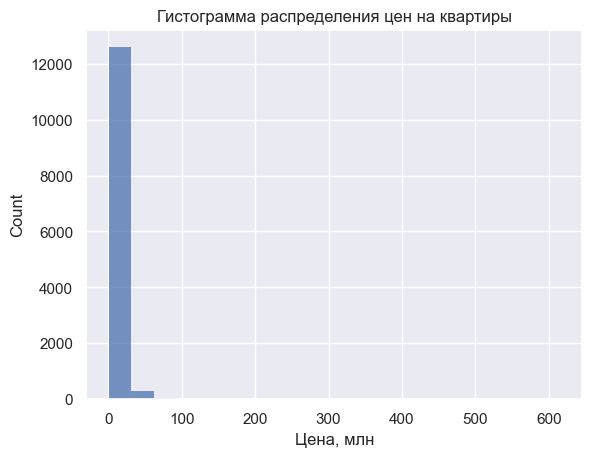

In [889]:
sns.histplot(x=dataset['Цена, млн'], bins=20)
plt.title('Гистограмма распределения цен на квартиры')
plt.show()

Рассмотрим распределение исключив аномальные выбросы

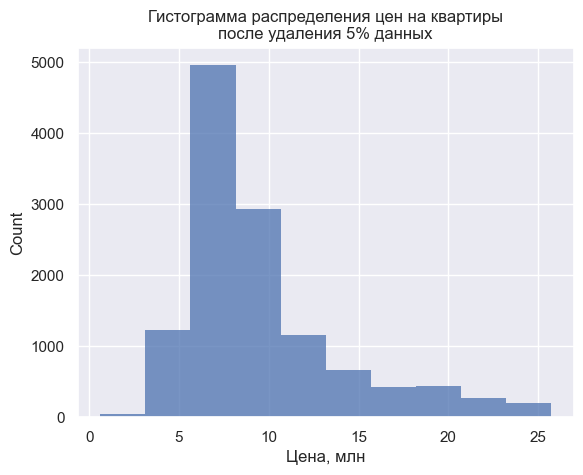

In [890]:
sns.histplot(dataset[dataset['Цена, млн']<=np.percentile(dataset['Цена, млн'],95)]['Цена, млн'], bins=10)
plt.title('Гистограмма распределения цен на квартиры')
plt.title('Гистограмма распределения цен на квартиры\nпосле удаления 5% данных')
plt.show()

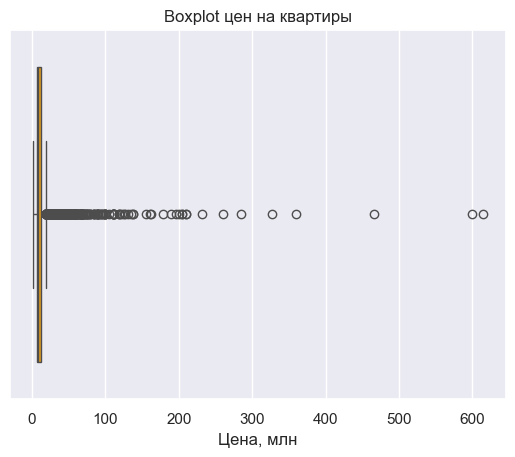

In [891]:
sns.boxplot(dataset['Цена, млн'], orient='h', color='orange')
plt.title('Boxplot цен на квартиры')
plt.show()

Ожидаемо в выбросах видим элитное жилье с эталонными показателями

In [892]:
Q1, Q3 = np.percentile(dataset['Цена, млн'], [25, 75])
IQR = Q3 - Q1
dataset[dataset['Цена, млн'] > (Q3 + 3*IQR)]

,Заголовок,Этап строительства,Год постройки,Класс жилья,Кол-во просмотров,Адрес,Тип здания,Количество комнат,Этажность,Тип объекта,...,Возможна ипотека,Лифт,Ближайшая станция метро,Ближайшая школа,Рейтинг школы,Номер этажа,"Цена, млн","Очищенная цена за м², млн","Расстояние до метро, м","Расстояние до ближайшей школы, м"
4,"Продаю 3-комнатную квартиру, 128 м², Москва, Д...",Сдан,2010.0,Элит класс,42,г. Москва\nТимирязевский\nДмитровское шоссе\n13,Монолитное,3,22,квартира,...,да,да,м. Тимирязевская,ГБОУ школа № 1236,63,5,27.170560,212.270,280.0,754.0
12,"Продаем 3-комнатную квартиру, 89.2 м², Москва,...",Сдан,2010.0,Бизнес класс,130,г. Москва\nТаганский\nул Рогожский Вал\n11к2,Монолитное,3,13,квартира,...,нет,да,м. Римская,ГБУ «Лаборатория путешествий»,636,3,36.000000,403.587,530.0,285.0
44,"Продажа 3-комнатной квартиры, 137.7 м², Москва...",Сдан,2010.0,Элит класс,56,г. Москва\nТимирязевский\nДмитровское шоссе\n13,Монолитное,3,12,квартира,...,да,да,м. Тимирязевская,ГБОУ школа № 1236,63,3,27.475281,199.530,280.0,754.0
101,"Продаю 4-комнатную квартиру, 110 м², Москва, М...",Сдан,1890.0,Элит класс,122,"г. Москва, пер. Милютинский, Дом 3",Монолитно-кирпичное,4,8,квартира,...,нет,нет,м. Лубянка,ГБОУ ДО ДТДиМ «На Стопани»,613,5,66.800000,607.273,372.0,798.0
107,"Продам 4-комнатную квартиру, 98 м², Москва, Об...",Сдан,1950.0,Неизвестно,75,"г. Москва, пер. Оболенский, Дом 2",Сталинское,4,5,квартира,...,да,нет,м. Парк культуры,ГБОУ школа № 1253,21,4,28.500000,290.816,476.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11897,"Продажа 3-комнатной квартиры, 116 м², Москва, ...",Отделка,NaN,Бизнес класс,56,г. Москва\nЗамоскворечье\nнаб Павелецкая\n8,Монолитное,3,16,квартира,...,да,да,м. Автозаводская,ГБОУ школа № 494,503,15,33.762472,291.056,814.0,817.0
11998,"Продаю 4-комнатную квартиру, 86 м², Москва, Са...",Неизвестно,NaN,Неизвестно,158,г. Москва\nПресненский\nСадовая-Кудринская ули...,Сталинское,4,8,квартира,...,да,нет,г. Москва (центр),ГБПОУ ПК № 50,680,7,30.000000,348.837,2435000.0,NaN
12405,"Продам 4-комнатную квартиру, 148.2 м², Москва,...",Отделка,2010.0,Бизнес класс,52,г. Москва\nСвиблово\nпроезд Серебрякова\n11к2 ...,Монолитное,4,16,квартира,...,нет,нет,м. Свиблово,ГБОУ Гимназия «Свиблово»,28,2,26.893409,181.467,1000.0,619.0
12714,"Продаем 4-комнатную квартиру, 126.8 м², Москва...",Отделка,2020.0,Элит класс,323,г. Москва\nПресненский\nМантулинская улица\n7,Монолитно-кирпичное,4,20,квартира,...,да,да,м. Выставочная,ГБОУ школа № 2055,456,18,45.648000,360.000,510.0,776.0


Поскольку это явно не недооцененные квартиры, исключим их из рассмотрения

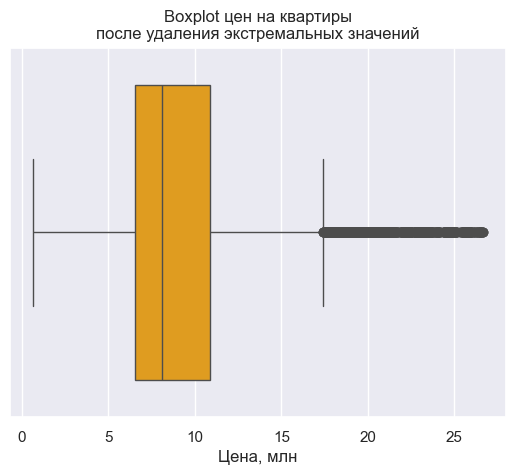

In [893]:
dataset = dataset[dataset['Цена, млн'] <= (Q3 + 3*IQR)]

sns.boxplot(dataset['Цена, млн'], color='orange', orient='h')
plt.title('Boxplot цен на квартиры\nпосле удаления экстремальных значений')
plt.show()

Делаем вывод, что недооцененное жилье будем искать где-то в общей массе, около ценовой отметки в 8.33 млн.

#### Общая площадь

In [894]:
dataset['Общая площадь'].describe()

count    12380.000000
mean        52.830572
std         22.122296
min         14.000000
25%         37.000000
50%         47.000000
75%         64.000000
max        542.000000
Name: Общая площадь, dtype: float64

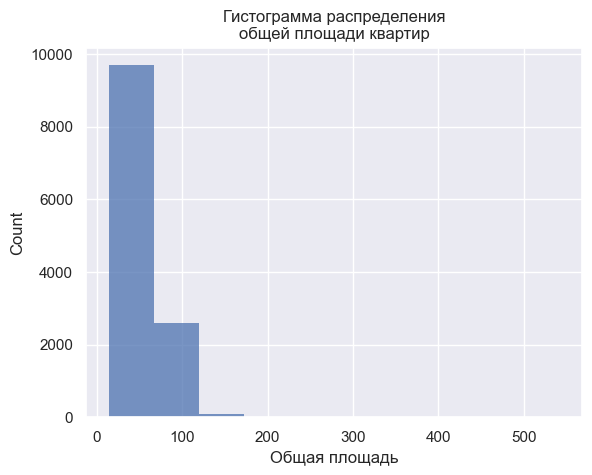

In [895]:
sns.histplot(dataset['Общая площадь'], bins=10)
plt.title('Гистограмма распределения\nобщей площади квартир')
plt.show()

Снова исключим из рассмотрения квартиры выходящий за межквартильный размах

In [896]:
Q1, Q3 = np.percentile(dataset['Общая площадь'], [25 ,75])
IQR = Q3 - Q1
dataset = dataset[dataset['Общая площадь']<=(Q3 + 3*IQR)]

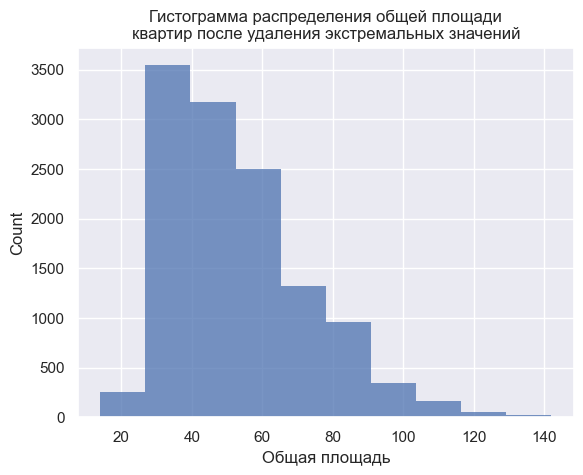

In [897]:
sns.histplot(dataset['Общая площадь'], bins=10)
plt.title('Гистограмма распределения общей площади\nквартир после удаления экстремальных значений')
plt.show()

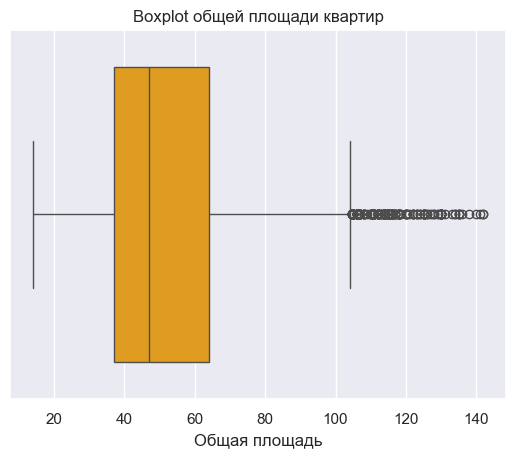

In [898]:
sns.boxplot(dataset['Общая площадь'], orient='h', color='orange')
plt.title('Boxplot общей площади квартир')
plt.show()

In [899]:
dataset['Общая площадь'].mean()

52.40276018466023

### 3.1.2. Количественные дискретные факторы

#### Год постройки

In [900]:
dataset['Год постройки'].describe()

count    6537.000000
mean     1994.835551
std        24.521892
min      1870.000000
25%      1970.000000
50%      2010.000000
75%      2010.000000
max      2020.000000
Name: Год постройки, dtype: float64

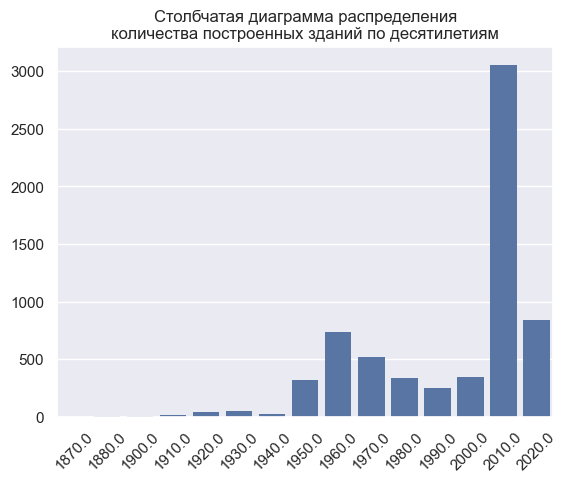

In [901]:
years = dataset['Год постройки'].value_counts().sort_index()
sns.barplot(x=[str(x) for x in years.index],y=years.values)
plt.xticks(rotation=45)
plt.title('Столбчатая диаграмма распределения\nколичества построенных зданий по десятилетиям')
plt.show()

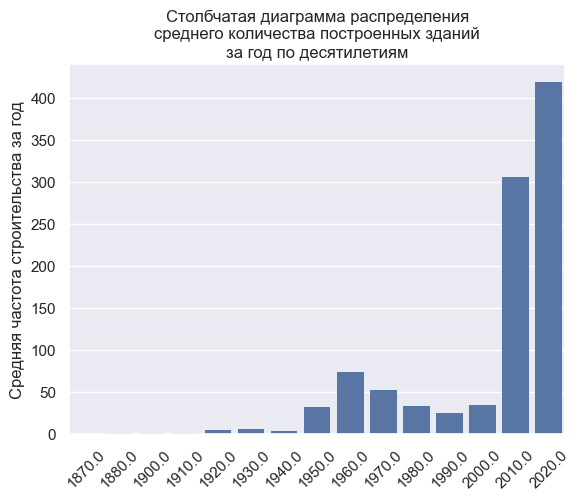

In [902]:
# подсчитаем среднюю частоту строительства за 1 год
years = dataset['Год постройки'].value_counts().sort_index() / 10
years[2020] = years[2020]*10/2 #т.к. в 2020 десятилетии представлено только 2 года

sns.barplot(x=[str(x) for x in years.index],y=years.values)
plt.xticks(rotation=45)
plt.ylabel('Средняя частота строительства за год')
plt.title('Столбчатая диаграмма распределения\nсреднего количества построенных зданий\nза год по десятилетиям')
plt.show()

#### Этажность

In [903]:
dataset['Этажность'].describe()

count    12347.000000
mean        17.330121
std          9.615415
min          1.000000
25%         11.000000
50%         16.000000
75%         21.000000
max         85.000000
Name: Этажность, dtype: float64

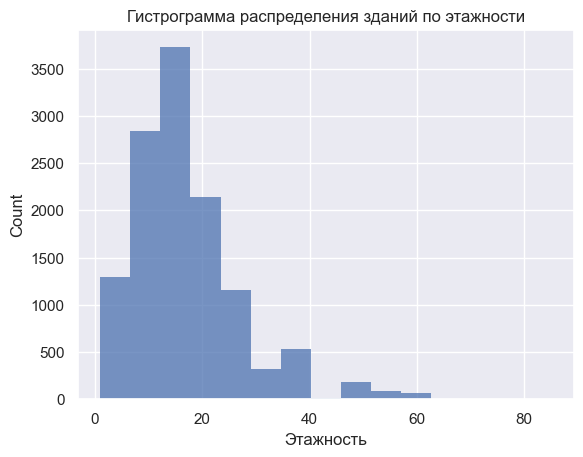

In [904]:
sns.histplot(dataset['Этажность'], bins=15)
plt.title('Гистрограмма распределения зданий по этажности')
plt.show()

### 3.1.3. Порядковые факторы (дискретные)

#### Рейтинг школы

In [905]:
dataset['Рейтинг школы'].describe()

count    12347.000000
mean       282.263060
std        204.149953
min          1.000000
25%         95.000000
50%        251.000000
75%        456.000000
max        696.000000
Name: Рейтинг школы, dtype: float64

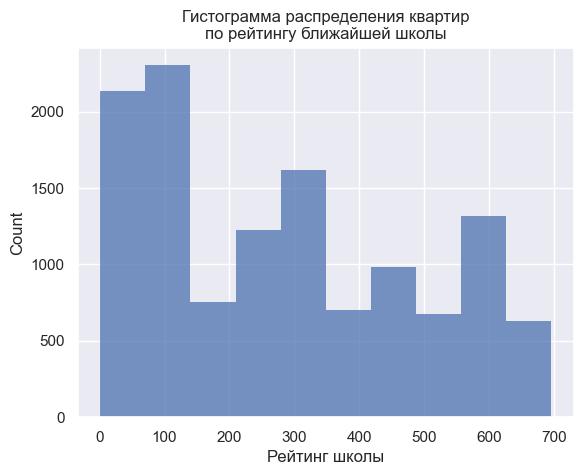

In [906]:
sns.histplot(dataset['Рейтинг школы'], bins=10)
plt.title('Гистограмма распределения квартир\nпо рейтингу ближайшей школы')
plt.show()

#### Номер этажа

In [907]:
dataset['Номер этажа'].describe()

count    12347.000000
mean         8.492346
std          6.499137
min          1.000000
25%          3.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Номер этажа, dtype: float64

In [908]:
dataset[dataset['Номер этажа'] > dataset['Этажность']]

,Заголовок,Этап строительства,Год постройки,Класс жилья,Кол-во просмотров,Адрес,Тип здания,Количество комнат,Этажность,Тип объекта,...,Возможна ипотека,Лифт,Ближайшая станция метро,Ближайшая школа,Рейтинг школы,Номер этажа,"Цена, млн","Очищенная цена за м², млн","Расстояние до метро, м","Расстояние до ближайшей школы, м"
116,"Продам 2-комнатную квартиру, 43 м², Москва, 20",Неизвестно,NaN,Неизвестно,122,Новая Москва\nп. Киевский\nг. Москва\n20,Панельное,2,6,квартира,...,да,да,г. Москва (центр),ГАОУ ДПО ЦПМ,678,9,4.39,102.093,NaN,NaN
131,"Продаем 1-комнатную квартиру, 40 м², Красное",Неизвестно,NaN,Неизвестно,22,"Москва, поселок Красное, поселок Краснопахорск...",Кирпичное,1,1,квартира,...,да,нет,м. Бунинская Аллея,ГАОУ ДПО ЦПМ,678,5,3.70,92.500,NaN,NaN
178,"Продаю 1-комнатную квартиру, 59 м², Москва, ул...",Возведение стен,2010.0,Элит класс,574,г. Москва\nТверской\nул Новослободская\n24,Монолитно-кирпичное,1,2,квартира,...,да,да,м. Менделеевская,ГБОУ лицей № 1501,7,10,25.98,440.339,170.0,437.0
258,"Продаем 3-комнатную квартиру, 81 м², Москва, у...",Неизвестно,2000.0,Неизвестно,346,"г. Москва, ул. Парковая 13-я, Дом 26",Неизвестно,3,9,квартира,...,да,нет,м. Щелковская,ГБОУ гимназия № 1563,204,17,15.35,189.506,NaN,551.0
265,"Продажа 1-комнатных апартаментов, 40 м², Москв...",Сдан,2010.0,Бизнес класс,418,г. Москва\nПреображенское\nул Хромова\n3,Монолитно-кирпичное,1,6,апартаменты,...,да,да,м. Преображенская площадь,ГБОУ гимназия № 1799 «Экополис»,432,10,6.70,167.500,620.0,414.0
336,"Продам 1-комнатную квартиру, 33 м², Москва, ул...",Сдан,1950.0,Неизвестно,325,"г. Москва, ул. Фортунатовская, Дом 31/35",Кирпичное,1,1,квартира,...,да,нет,м. Партизанская,ГБОУ школа № 1362,443,5,5.30,160.606,621.0,247.0
914,"Продажа 1-комнатной квартиры, 43 м², Москва, Л...",Сдан,NaN,Комфорт класс,245,г. Москва\nСП Сосенское\nЛиповый парк \n5к1,Монолитно-кирпичное,1,11,квартира,...,да,да,м. Бунинская Аллея,ГАПОУ ТК № 24,603,16,6.40,148.837,6.6,NaN
11342,"Продается 2-комнатная квартира, 58 м², Москва,...",Отделка,2010.0,Бизнес класс,1009,г. Москва\nХорошёво-Мнёвники\nхорошевская 3-я....,Монолитное,2,10,квартира,...,да,да,м. Октябрьское поле,ГБОУ школа № 1287,81,22,11.50,198.276,1008.0,528.0


Явно аномальные данные которые стоит удалить

In [909]:
dataset = dataset[dataset['Номер этажа'] <= dataset['Этажность']]

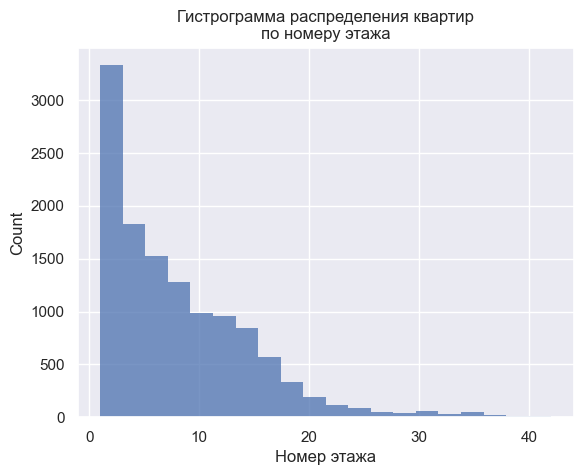

In [910]:
sns.histplot(dataset['Номер этажа'], bins=20)
plt.title('Гистрограмма распределения квартир\nпо номеру этажа')
plt.show()

### 3.1.4. Категориальные факторы (дискретные)

In [911]:
dataset['Возможна ипотека'].describe()

count     12339
unique        2
top          да
freq      10848
Name: Возможна ипотека, dtype: object

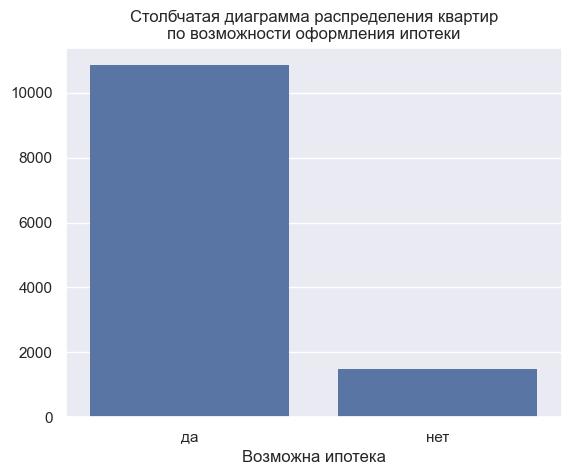

In [912]:
data = dataset['Возможна ипотека'].value_counts()

sns.barplot(x=data.index, y=data.values)
plt.title('Столбчатая диаграмма распределения квартир\nпо возможности оформления ипотеки')
plt.show()

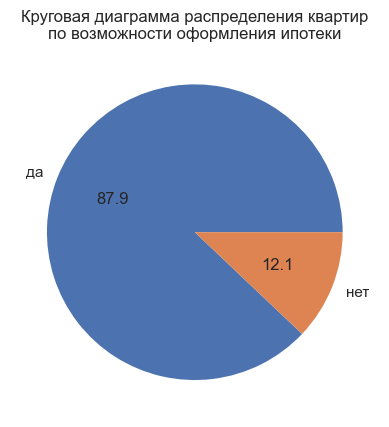

In [913]:
plt.pie(data, labels=data.index, autopct='%.1f')
plt.title('Круговая диаграмма распределения квартир\nпо возможности оформления ипотеки')
plt.show()

## 3.2. Двумерный анализ

### 3.2.1. Диаграммы рассеяния

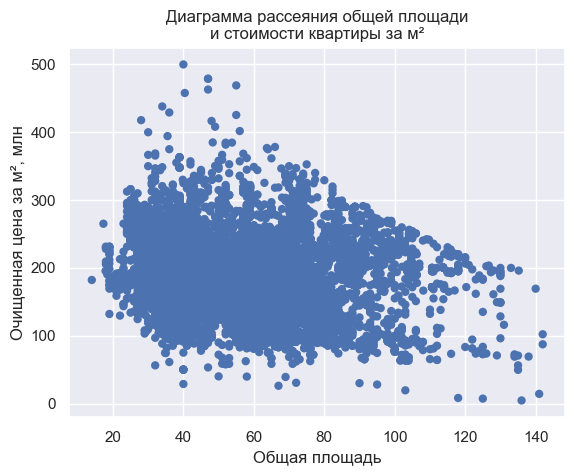

In [914]:

sns.scatterplot(x=dataset['Общая площадь'], y=dataset['Очищенная цена за м², млн'], edgecolor='none')
plt.title('Диаграмма рассеяния общей площади\nи стоимости квартиры за м²')
plt.show()

Возможно наличие слабой корреляции Пирсона

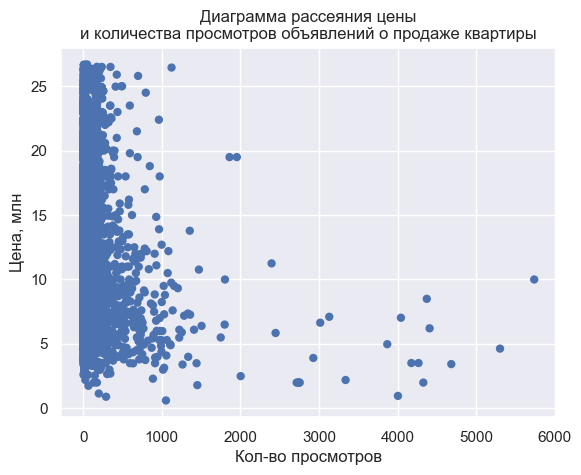

In [915]:

sns.scatterplot(x=dataset['Кол-во просмотров'], y=dataset['Цена, млн'], edgecolor='none')
plt.title('Диаграмма рассеяния цены\nи количества просмотров объявлений о продаже квартиры')
plt.show()

Если смотреть в сторону более 800 просмотров, то чем дешевле квартира, тем чаще ей интересовались люди - в целом, все логично.

### 3.2.2. Диаграммы размаха с группировкой

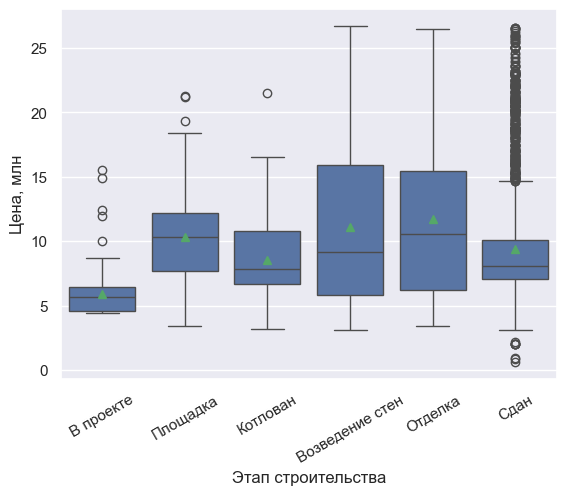

In [916]:
sns.boxplot(x='Этап строительства', y='Цена, млн', data=dataset, order=['В проекте','Площадка','Котлован','Возведение стен','Отделка', 'Сдан'], showmeans=True)
plt.xticks(rotation=30)
plt.show()

Text(0.5, 0, 'Наличие лифта')

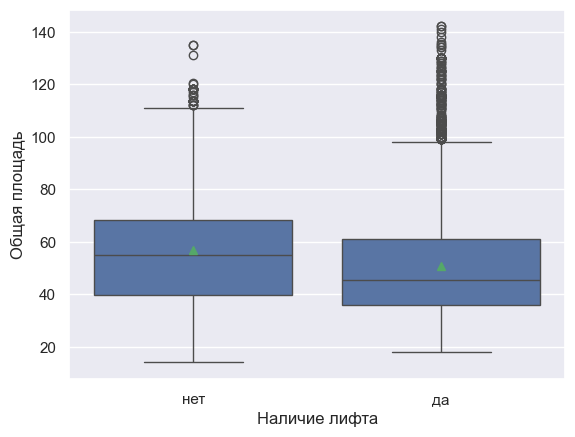

In [917]:
sns.boxplot(x='Лифт', y='Общая площадь', data=dataset, showmeans=True)
plt.xlabel('Наличие лифта')

### 3.2.3. Столбчатые диаграммы с группировкой

In [918]:
WF = pd.crosstab(dataset['Лифт'],dataset['Возможна ипотека']) 
WF

Возможна ипотека,да,нет
Лифт,,
да,8416,283
нет,2432,1208


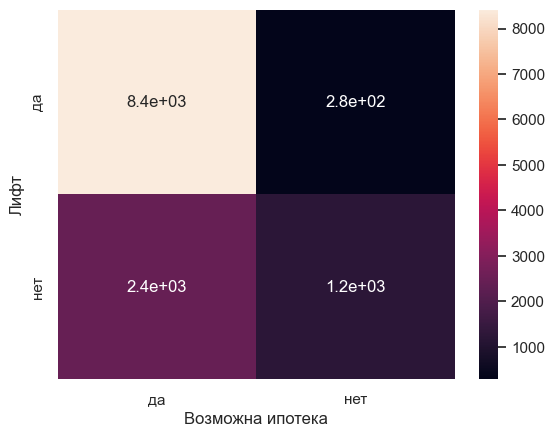

In [919]:
sns.heatmap(WF, annot=True)
plt.show()

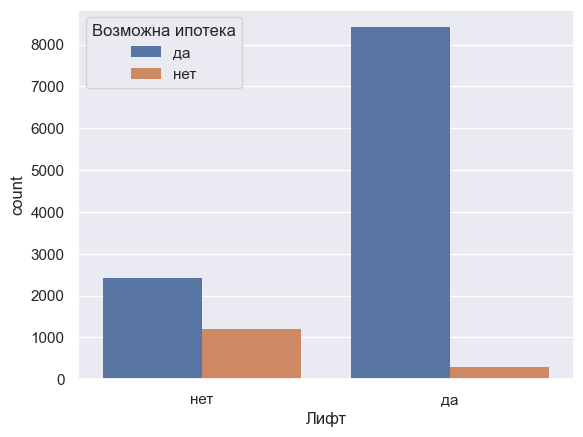

In [920]:
sns.countplot(x=dataset['Лифт'], hue=dataset['Возможна ипотека'])
plt.show()

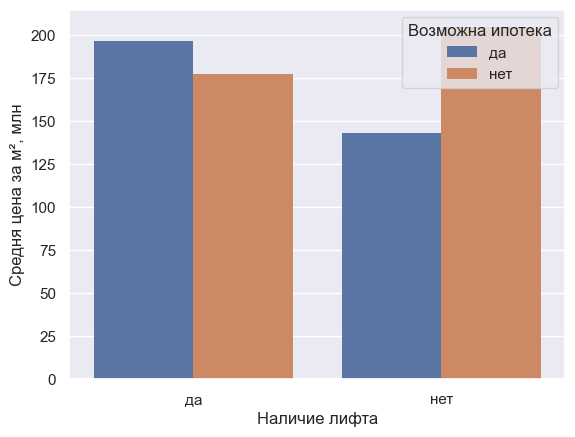

In [ ]:
df = dataset.groupby(['Лифт', 'Возможна ипотека']).agg(mean_2_factors=('Очищенная цена за м², млн', 'mean'))
df = df.reset_index()

sns.barplot(x="Лифт", y="mean_2_factors", hue="Возможна ипотека", data=df)
plt.xlabel('Наличие лифта')
plt.ylabel('Средняя цена за м², млн')
plt.show()

Видим интересную тенденцию что в домах без лифта и возможности оформления ипотеки средняя цена за м² выше, что может говорить о том что это чаще старые и престижные дома.

In [923]:
dataset['Очищенная цена за м², млн'].describe()

count    12339.000000
mean       186.425132
std         54.563776
min          4.499000
25%        146.954500
50%        187.500000
75%        223.873500
max        500.000000
Name: Очищенная цена за м², млн, dtype: float64

### 3.2.4. Тепловая карта

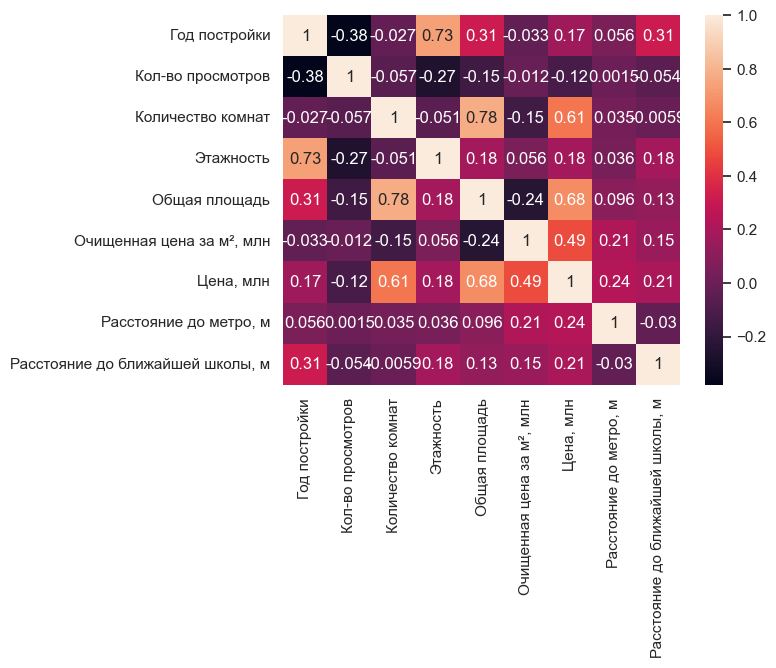

In [926]:
num_cols=['Год постройки','Кол-во просмотров','Количество комнат','Этажность','Общая площадь','Очищенная цена за м², млн','Цена, млн','Расстояние до метро, м', 'Расстояние до ближайшей школы, м']

sns.heatmap(dataset[num_cols].corr(method='spearman'), annot=True)
plt.show()

* Самый низкий коэффициент корреляции = **-0.38** установлен между факторами **Кол-во просмотров и Год постройки**, т.е. обратная корреляция - **наиболее активно просматривают обявления квартир в более старых зданиях**;

* Самый высокий коэффициент корреляции = **0.77** установлен между факторами **Количество комнат и Общая площадь**, т.е. прямая корреляция - **чем больше комнат, тем больше площадь и наоборот**.